In [ ]:
import os
import pandas as pd
from tqdm import tqdm

# 1. Google Drive 마운트 (Google Colab을 사용하는 경우)
from google.colab import drive
drive.mount('/content/drive')

# 2. 기본 경로 설정
base_path = "/content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 감성분석 데이터"     
output_base_path = "/content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수"

# 3. 섹터별 폴더 탐색
sectors = [sector for sector in os.listdir(base_path) if os.path.isdir(os.path.join(base_path, sector))]

for sector in tqdm(sectors, desc="Processing sectors"):
    sector_path = os.path.join(base_path, sector)
    output_sector_path = os.path.join(output_base_path, sector)

    # 출력 섹터 폴더가 없으면 생성
    if not os.path.exists(output_sector_path):
        os.makedirs(output_sector_path)

    # 섹터 내의 기업 파일 탐색
    company_files = [file for file in os.listdir(sector_path) if os.path.isfile(os.path.join(sector_path, file))]

    for company_file in tqdm(company_files, desc=f"Processing companies in {sector}", leave=False):
        company_file_path = os.path.join(sector_path, company_file)

        # 파일 읽기
        if company_file.endswith('.csv'):
            try:
                df = pd.read_csv(company_file_path)
            except Exception as e:
                print(f"Error reading {company_file_path}: {e}")
                continue
        elif company_file.endswith('.xlsx'):
            try:
                df = pd.read_excel(company_file_path)
            except Exception as e:
                print(f"Error reading {company_file_path}: {e}")
                continue
        else:
            print(f"Unsupported file format: {company_file_path}")
            continue

        # 필수 컬럼 확인
        required_columns = ['Date', 'Article Title', 'Sentiment Label', 'Neutral Probability', 'Positive Probability', 'Negative Probability']
        if not all(col in df.columns for col in required_columns):
            print(f"Missing columns in {company_file_path}. Required columns: {required_columns}")
            continue

        # 감성 점수 계산
        df['sentiment_score'] = (df['Positive Probability'] - df['Negative Probability']) * (1 - df['Neutral Probability'])

        # 날짜 형식 변환 및 시간 제거
        try:
            df['Date'] = pd.to_datetime(df['Date']).dt.date
        except Exception as e:
            print(f"Error parsing dates in {company_file_path}: {e}")
            continue

        # 일일 평균 점수 계산
        daily_mean = df.groupby('Date')['sentiment_score'].mean().reset_index()
        daily_mean.rename(columns={'sentiment_score': 'mean_score'}, inplace=True)

        # 날짜 범위 필터링 및 보완
        start_date = pd.to_datetime('2023-07-01').date()
        end_date = pd.to_datetime('2024-06-30').date()
        all_dates = pd.date_range(start=start_date, end=end_date).date

        # 모든 날짜에 대해 일일 평균 점수를 포함하도록 보완
        daily_mean = pd.DataFrame({'Date': all_dates}).merge(daily_mean, on='Date', how='left')
        daily_mean['mean_score'] = daily_mean['mean_score'].fillna(0)  # 점수 없는 날은 결측치 처리

        # 결과 저장
        company_name = company_file.split('_sentiment_results')[0]
        output_file_name = f"{company_name}_daymean_score.csv"
        output_file_path = os.path.join(output_sector_path, output_file_name)

        try:
            daily_mean.to_csv(output_file_path, index=False)
            print(f"Saved file: {output_file_path}")
        except Exception as e:
            print(f"Error saving {output_file_path}: {e}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Processing companies in 헬스케어:  12%|█▎        | 5/40 [00:00<00:00, 44.09it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/동국제약_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/SK바이오팜_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/HLB테라퓨틱스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/알테오젠_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/에이비엘바이오_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/에스디바이오센서_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/파마리서치_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/클래시스_daymean_score.csv



Processing companies in 헬스케어:  38%|███▊      | 15/40 [00:00<00:00, 40.14it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/보로노이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/케어젠_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/한올바이오파마_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/대웅_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/씨젠_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/펩트론_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/삼천당제약_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/녹십자_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/HK이노엔_daymean_sco


Processing companies in 헬스케어:  50%|█████     | 20/40 [00:00<00:00, 38.23it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/휴젤_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/종근당_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/삼성바이오로직스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/셀트리온_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/HLB_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/HLB생명과학_daymean_score.csv



Processing companies in 헬스케어:  62%|██████▎   | 25/40 [00:00<00:00, 39.48it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/리가켐바이오_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/한미약품_daymean_score.csv



Processing companies in 헬스케어:  72%|███████▎  | 29/40 [00:00<00:00, 38.77it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/보령_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/차바이오텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/에스티팜_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/한미사이언스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/루닛_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/셀트리온제약_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/동아쏘시오홀딩스_daymean_score.csv



Processing companies in 헬스케어:  95%|█████████▌| 38/40 [00:01<00:00, 36.68it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/네이처셀_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/유한양행_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/오스코텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/SK바이오사이언스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/메지온_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/메디톡스_daymean_score.csv



Processing sectors:   8%|▊         | 1/13 [00:01<00:13,  1.10s/it]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/녹십자홀딩스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/헬스케어/대웅제약_daymean_score.csv



Processing companies in 증권:  57%|█████▋    | 4/7 [00:00<00:00, 37.91it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/한국금융지주_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/미래에셋증권_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/키움증권_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/한화투자증권_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/삼성증권_daymean_score.csv



Processing sectors:  15%|█▌        | 2/13 [00:01<00:06,  1.72it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/NH투자증권_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/증권/대신증권_daymean_score.csv



Processing companies in 철강:  38%|███▊      | 5/13 [00:00<00:00, 41.69it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/세아제강_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/POSCO홀딩스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/세아제강지주_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/고려아연_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/현대제철_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/풍산_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/KG스틸_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/대한제강_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/고려제강_daymean_score.csv



Processing sectors:  23%|██▎       | 3/13 [00:01<00:04,  2.07it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/세아베스틸지주_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/동국제강_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/동일산업_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/철강/포스코엠텍_daymean_score.csv



Processing companies in 경기소비재:   0%|          | 0/35 [00:00<?, ?it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/아난티_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/현대백화점_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/호텔신라_daymean_score.csv



Processing companies in 경기소비재:  11%|█▏        | 4/35 [00:00<00:00, 36.88it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/케이카_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/젬백스링크_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/휠라홀딩스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/영원무역홀딩스_daymean_score.csv



Processing companies in 경기소비재:  23%|██▎       | 8/35 [00:00<00:00, 32.27it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/GKL_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/골프존_daymean_score.csv



Processing companies in 경기소비재:  34%|███▍      | 12/35 [00:00<00:00, 31.61it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/LG전자_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/신세계인터내셔날_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/더블유게임즈_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/롯데쇼핑_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/신세계_daymean_score.csv



Processing companies in 경기소비재:  46%|████▌     | 16/35 [00:00<00:00, 33.27it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/LS네트웍스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/한샘_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/코웨이_daymean_score.csv



Processing companies in 경기소비재:  60%|██████    | 21/35 [00:00<00:00, 37.07it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/화승엔터프라이즈_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/에코마케팅_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/한세실업_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/한섬_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/서부T&amp_D_daymean_score.csv



Processing companies in 경기소비재:  71%|███████▏  | 25/35 [00:00<00:00, 36.30it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/파라다이스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/영원무역_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/감성코퍼레이션_daymean_score.csv



Processing companies in 경기소비재:  83%|████████▎ | 29/35 [00:00<00:00, 37.20it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/강원랜드_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/롯데관광개발_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/하나투어_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/쿠쿠홈시스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/아이패밀리에스씨_daymean_score.csv



Processing companies in 경기소비재:  94%|█████████▍| 33/35 [00:00<00:00, 37.23it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/메가스터디교육_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/DI동일_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/실리콘투_daymean_score.csv



Processing sectors:  31%|███       | 4/13 [00:02<00:06,  1.43it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/현대홈쇼핑_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/락앤락_daymean_score.csv



Processing companies in 에너지화학:   0%|          | 0/25 [00:00<?, ?it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/HD현대_daymean_score.csv



Processing companies in 에너지화학:  16%|█▌        | 4/25 [00:00<00:00, 35.70it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/코오롱인더_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/한솔케미칼_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/SK아이이테크놀로지_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/LG화학_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/SK가스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/OCI홀딩스_daymean_score.csv



Processing companies in 에너지화학:  32%|███▏      | 8/25 [00:00<00:00, 28.63it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/에코프로_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/S-Oil_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/롯데케미칼_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/엔켐_daymean_score.csv



Processing companies in 에너지화학:  52%|█████▏    | 13/25 [00:00<00:00, 32.86it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/나노신소재_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/SK이노베이션_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/효성첨단소재_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/솔브레인_daymean_score.csv



Processing companies in 에너지화학:  68%|██████▊   | 17/25 [00:00<00:00, 34.87it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/효성티앤씨_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/금호석유_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/롯데정밀화학_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/KCC_daymean_score.csv



Processing companies in 에너지화학:  88%|████████▊ | 22/25 [00:00<00:00, 37.30it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/SK케미칼_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/PI첨단소재_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/천보_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/동진쎄미켐_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/SKC_daymean_score.csv



Processing sectors:  38%|███▊      | 5/13 [00:03<00:05,  1.39it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/에너지화학/한화솔루션_daymean_score.csv



Processing companies in 은행:   0%|          | 0/9 [00:00<?, ?it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/우리금융지주_daymean_score.csv



Processing companies in 은행:  56%|█████▌    | 5/9 [00:00<00:00, 45.79it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/DGB금융지주_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/신한지주_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/JB금융지주_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/KB금융_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/기업은행_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/하나금융지주_daymean_score.csv


Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/카카오뱅크_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/은행/BNK금융지주_daymean_score.csv


Processing companies in 기계장비:   0%|          | 0/36 [00:00<?, ?it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/현대로템_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/두산에너빌리티_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/LG에너지솔루션_daymean_score.csv



Processing companies in 기계장비:  11%|█         | 4/36 [00:00<00:01, 31.41it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD현대미포_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/대한전선_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/LS ELECTRIC_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD현대인프라코어_daymean_score.csv



Processing companies in 기계장비:  22%|██▏       | 8/36 [00:00<00:00, 32.46it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD현대일렉트릭_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/신성델타테크_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/한화오션_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/LS에코에너지_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/피엔티_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/레인보우로보틱스_daymean_score.csv



Processing companies in 기계장비:  36%|███▌      | 13/36 [00:00<00:00, 36.89it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/일진전기_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/두산퓨얼셀_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/LS머트리얼즈_daymean_score.csv



Processing companies in 기계장비:  47%|████▋     | 17/36 [00:00<00:00, 36.09it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/에코프로_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/한화엔진_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/엘앤에프_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/씨에스윈드_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/에코프로비엠_daymean_score.csv



Processing companies in 기계장비:  61%|██████    | 22/36 [00:00<00:00, 38.00it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/삼성중공업_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/현대엘리베이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD한국조선해양_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/더블유씨피_daymean_score.csv



Processing companies in 기계장비:  75%|███████▌  | 27/36 [00:00<00:00, 39.32it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/두산밥캣_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/LS_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/제룡전기_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD현대마린솔루션_daymean_score.csv



Processing companies in 기계장비:  86%|████████▌ | 31/36 [00:00<00:00, 37.55it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/에코프로머티_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD현대중공업_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/SK아이이테크놀로지_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/효성중공업_daymean_score.csv



Processing companies in 기계장비:  97%|█████████▋| 35/36 [00:00<00:00, 37.97it/s]


Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/HD현대건설기계_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/두산로보틱스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/기계장비/포스코퓨처엠_daymean_score.csv


Processing companies in 자동차:  30%|███       | 3/10 [00:00<00:00, 28.68it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/명신산업_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/금호타이어_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/현대차_daymean_score.csv



Processing companies in 자동차:  60%|██████    | 6/10 [00:00<00:00, 29.32it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/현대위아_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/현대모비스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/HL만도_daymean_score.csv



Processing companies in 자동차:  90%|█████████ | 9/10 [00:00<00:00, 28.98it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/한온시스템_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/에스엘_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/기아_daymean_score.csv



Processing sectors:  62%|██████▏   | 8/13 [00:05<00:03,  1.66it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/자동차/한국타이어앤테크놀로지_daymean_score.csv



Processing companies in 보험:   0%|          | 0/8 [00:00<?, ?it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/코리안리_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/삼성생명_daymean_score.csv



Processing companies in 보험:  62%|██████▎   | 5/8 [00:00<00:00, 43.90it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/동양생명_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/미래에셋생명_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/DB손해보험_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/현대해상_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/한화생명_daymean_score.csv



Processing sectors:  69%|██████▉   | 9/13 [00:05<00:01,  2.05it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/보험/삼성화재_daymean_score.csv



Processing companies in 반도체:   7%|▋         | 4/55 [00:00<00:01, 35.40it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/신성이엔지_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/디아이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/에스티아이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/하나머티리얼즈_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/코미코_daymean_score.csv



Processing companies in 반도체:  15%|█▍        | 8/55 [00:00<00:01, 37.52it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/피에스케이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/SFA반도체_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/덕산네오룩스_daymean_score.csv



Processing companies in 반도체:  22%|██▏       | 12/55 [00:00<00:01, 35.92it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/해성디에스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/케이씨텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/네오셈_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/선익시스템_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/에이직랜드_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/ISC_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/에프에스티_daymean_score.csv



Processing companies in 반도체:  36%|███▋      | 20/55 [00:00<00:01, 34.21it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/이녹스첨단소재_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/원익QnC_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/미코_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/RFHIC_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/DB하이텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/AP시스템_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/테스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/심텍_daymean_score.csv



Processing companies in 반도체:  44%|████▎     | 24/55 [00:00<00:00, 32.95it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/자람테크놀로지_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/피에스케이홀딩스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/티씨케이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/HB솔루션_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/제우스_daymean_score.csv



Processing companies in 반도체:  53%|█████▎    | 29/55 [00:00<00:00, 35.68it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/기가비스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/원익IPS_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/유진테크_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/한미반도체_daymean_score.csv



Processing companies in 반도체:  60%|██████    | 33/55 [00:00<00:00, 36.69it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/필옵틱스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/덕산테코피아_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/두산테스나_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/리노공업_daymean_score.csv



Processing companies in 반도체:  67%|██████▋   | 37/55 [00:01<00:00, 36.26it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/LX세미콘_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/에스앤에스텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/테크윙_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/가온칩스_daymean_score.csv



Processing companies in 반도체:  75%|███████▍  | 41/55 [00:01<00:00, 37.24it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/이오테크닉스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/HPSP_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/하나마이크론_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/SK하이닉스_daymean_score.csv



Processing companies in 반도체:  82%|████████▏ | 45/55 [00:01<00:00, 37.45it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/파두_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/와이씨_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/주성엔지니어링_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/디아이티_daymean_score.csv



Processing companies in 반도체:  91%|█████████ | 50/55 [00:01<00:00, 36.96it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/티에스이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/아이티엠반도체_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/고영_daymean_score.csv



Processing companies in 반도체:  98%|█████████▊| 54/55 [00:01<00:00, 34.33it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/제주반도체_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/삼성전자_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/오픈엣지테크놀로지_daymean_score.csv



Processing sectors:  77%|███████▋  | 10/13 [00:06<00:02,  1.20it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체/넥스틴_daymean_score.csv



Processing companies in 건설:   0%|          | 0/28 [00:00<?, ?it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/HLB글로벌_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/GS건설_daymean_score.csv



Processing companies in 건설:  14%|█▍        | 4/28 [00:00<00:00, 38.91it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/삼부토건_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/DL_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/현대무벡스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/서희건설_daymean_score.csv



Processing companies in 건설:  29%|██▊       | 8/28 [00:00<00:00, 37.10it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/대우건설_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/동국S&amp_C_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/금호건설_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/삼표시멘트_daymean_score.csv



Processing companies in 건설:  43%|████▎     | 12/28 [00:00<00:00, 36.98it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/현대건설_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/LX하우시스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/아이에스동서_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/삼성엔지니어링_daymean_score.csv



Processing companies in 건설:  61%|██████    | 17/28 [00:00<00:00, 39.51it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/한전기술_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/쌍용C&amp_E_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/HDC현대산업개발_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/DL이앤씨_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/도화엔지니어링_daymean_score.csv



Processing companies in 건설:  75%|███████▌  | 21/28 [00:00<00:00, 37.29it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/코오롱모빌리티그룹_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/코오롱글로벌_daymean_score.csv



Processing companies in 건설:  89%|████████▉ | 25/28 [00:00<00:00, 37.21it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/경동나비엔_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/포스코퓨처엠_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/티와이홀딩스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/유진기업_daymean_score.csv


Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/아세아시멘트_daymean_score.csv



Processing sectors:  85%|████████▍ | 11/13 [00:07<00:01,  1.22it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/KCC글라스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/건설/한일시멘트_daymean_score.csv



Processing companies in 방송통신:  57%|█████▋    | 4/7 [00:00<00:00, 35.36it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/SK텔레콤_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/스카이라이프_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/케이아이엔엑스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/LG헬로비전_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/KT_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/SBS_daymean_score.csv



Processing sectors:  92%|█████████▏| 12/13 [00:07<00:00,  1.54it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/방송통신/LG유플러스_daymean_score.csv



Processing companies in 정보기술:  14%|█▎        | 5/37 [00:00<00:00, 42.07it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/코스모신소재_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/원익IPS_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/고영_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/대덕전자_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/삼성에스디에스_daymean_score.csv


Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/하나머티리얼즈_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/DB하이텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/더존비즈온_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/해성디에스_daymean_score.csv



Processing companies in 정보기술:  27%|██▋       | 10/37 [00:00<00:00, 42.30it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/덕산네오룩스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/HPSP_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/삼성전기_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/SK스퀘어_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/주성엔지니어링_daymean_score.csv



Processing companies in 정보기술:  41%|████      | 15/37 [00:00<00:00, 38.10it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/SK하이닉스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/대주전자재료_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/비에이치_daymean_score.csv



Processing companies in 정보기술:  51%|█████▏    | 19/37 [00:00<00:00, 37.29it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/한미반도체_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/삼성전자_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/파크시스템스_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/디어유_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/이오테크닉스_daymean_score.csv



Processing companies in 정보기술:  62%|██████▏   | 23/37 [00:00<00:00, 35.89it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/하나마이크론_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/롯데에너지머티리얼즈_daymean_score.csv



Processing companies in 정보기술:  73%|███████▎  | 27/37 [00:00<00:00, 36.79it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/포스코DX_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/LG디스플레이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/LX세미콘_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/솔루엠_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/현대오토에버_daymean_score.csv



Processing companies in 정보기술:  84%|████████▍ | 31/37 [00:00<00:00, 34.89it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/심텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/리노공업_daymean_score.csv



Processing companies in 정보기술:  95%|█████████▍| 35/37 [00:00<00:00, 32.57it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/티씨케이_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/삼성SDI_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/LG이노텍_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/카카오페이_daymean_score.csv



Processing sectors: 100%|██████████| 13/13 [00:09<00:00,  1.43it/s]

Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/솔루스첨단소재_daymean_score.csv
Saved file: /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/정보기술/엘앤에프_daymean_score.csv


In [20]:
import pandas as pd
import os

# 기업별 가중치 데이터
weights = {
    "LG전자": 0.285044507,
    "코웨이": 0.090669858,
    "강원랜드": 0.072918731,
    "휠라홀딩스": 0.045848162,
    "실리콘투": 0.042037555,
    "롯데쇼핑": 0.034083433,
    "영원무역": 0.033936795,
    "호텔신라": 0.029515857,
    "신세계": 0.026044102,
    "한샘": 0.023458121,
    "영원무역홀딩스": 0.02288544,
    "DI동일": 0.020461949,
    "더블유게임즈": 0.020083465,
    "현대백화점": 0.019639588,
    "파라다이스": 0.017204207,
    "하나투어": 0.015731882,
    "롯데관광개발": 0.013348024,
    "GKL": 0.012785251,
    "케이카": 0.011705281,
    "화승엔터프라이즈": 0.011009742,
    "한세실업": 0.010938404,
    "현대홈쇼핑": 0.010486601,
    "메가스터디교육": 0.009460134,
    "쿠쿠홈시스": 0.009402668,
    "아난티": 0.009396723,
    "골프존": 0.008071036,
    "서부T&amp_D": 0.007660846,
    "신세계인터내셔날": 0.007660846,
    "락앤락": 0.007442871,
    "한섬": 0.006866227,
    "에코마케팅": 0.005792202,
    "아이패밀리에스씨": 0.005603951,
    "감성코퍼레이션": 0.005457313,
    "LS네트웍스": 0.004732049
}


# 데이터 파일 경로
data_path = "/content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재"

# 결과를 저장할 DataFrame 초기화
sector_daily_scores = None

# 기업별 파일 처리
for company, weight in weights.items():
    file_path = os.path.join(data_path, f"{company}_daymean_score.csv")

    # 파일 읽기
    if os.path.exists(file_path):
        df = pd.read_csv(file_path)
        df['Date'] = pd.to_datetime(df['Date'])  # 날짜 형식 변환

        # 가중치를 적용한 점수 계산
        df['weighted_score'] = df['mean_score'] * weight

        # 결과 병합
        if sector_daily_scores is None:
            # 첫 번째 기업일 경우 초기화
            sector_daily_scores = df[['Date', 'weighted_score']].copy()
            sector_daily_scores.rename(columns={'weighted_score': 'sector_weighted_score'}, inplace=True)
        else:
            # 이후 기업 데이터는 기존 데이터에 합산
            sector_daily_scores = pd.merge(
                sector_daily_scores,
                df[['Date', 'weighted_score']],
                on='Date',
                how='outer'
            )
            # 같은 날의 점수를 합산
            sector_daily_scores['sector_weighted_score'] += sector_daily_scores['weighted_score'].fillna(0)
            sector_daily_scores.drop(columns=['weighted_score'], inplace=True)
    else:
        print(f"Warning: File for {company} not found at {file_path}")

# 정렬 및 결측치 처리
sector_daily_scores.sort_values(by='Date', inplace=True)
sector_daily_scores.fillna(0, inplace=True)

# 결과 저장
output_file = os.path.join(data_path, "경기소비재_sector_daily_weighted_scores.csv")
sector_daily_scores.to_csv(output_file, index=False, encoding='utf-8-sig')

print(f"Sector daily weighted scores saved to {output_file}")


Sector daily weighted scores saved to /content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/경기소비재/경기소비재_sector_daily_weighted_scores.csv


<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4352 (\N{HANGUL CHOSEONG KIYEOK}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4455 (\N{HANGUL JUNGSEONG YEO}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4540 (\N{HANGUL JONGSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4469 (\N{HANGUL JUNGSEONG I}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-22-5c9ba69791a8>:37: UserWarning: Glyph

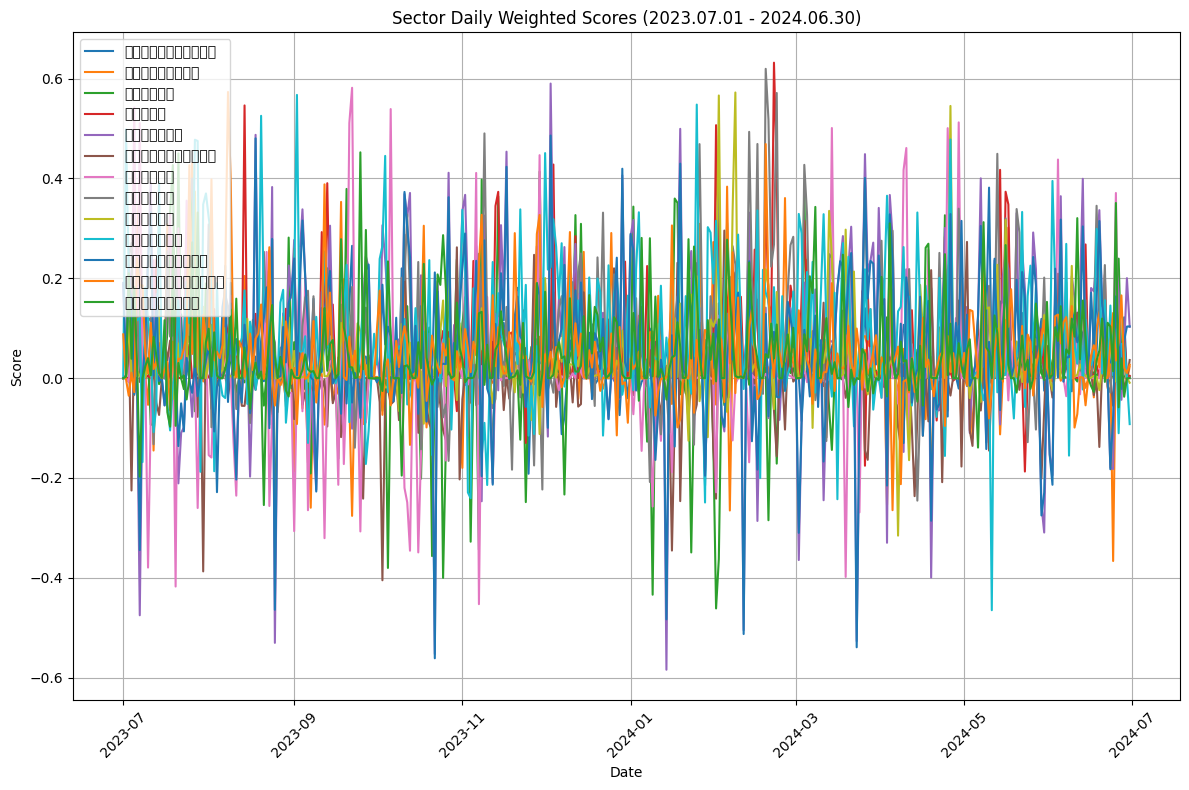

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# CSV 파일들이 저장된 디렉토리 경로
directory_path = '/content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/섹터별 일일 평균 점수 - 4차'

# 섹터별 시각화를 위한 기본적인 설정
sector_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# 각 섹터의 시계열 데이터를 시각화
plt.figure(figsize=(12, 8))

for sector_file in sector_files:
    # 각 파일의 전체 경로
    file_path = os.path.join(directory_path, sector_file)

    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 날짜 컬럼이 'Date'라고 가정하고 날짜 형식으로 변환
    df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

    # 'Score' 컬럼이 섹터의 점수를 나타낸다고 가정
    sector_name = sector_file.split('_')[0]  # 섹터명 추출
    plt.plot(df['Date'], df['sector_weighted_score'], label=sector_name)

# 그래프 제목 및 레이블 설정
plt.title('Sector Daily Weighted Scores (2023.07.01 - 2024.06.30)')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend(loc='upper left')
plt.grid(True)
plt.xticks(rotation=45)  # x축 레이블 회전

# 시각화 출력
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import os

# 경로 설정
directory_path = '/content/drive/MyDrive/KHUDA 금융/심화트랙/데이터/기업별 일일 평균 감성 점수 - 3차/반도체'

# 폴더 내 모든 CSV 파일 리스트 가져오기
csv_files = [f for f in os.listdir(directory_path) if f.endswith('.csv')]

# '2023.7.15'일자의 데이터만 필터링하여 출력
for csv_file in csv_files:
    file_path = os.path.join(directory_path, csv_file)

    # CSV 파일 읽기
    df = pd.read_csv(file_path)

    # 'Date' 컬럼을 자동으로 날짜 형식으로 변환
    df['Date'] = pd.to_datetime(df['Date'])

    # 'Date' 컬럼이 '2023-07-15'인 데이터만 필터링
    filtered_df = df[df['Date'] == '2023-07-15']

    # 필터링된 데이터가 있을 경우 출력
    if not filtered_df.empty:
        print(f"Data from {csv_file} on 2023.7.15:")
        print(filtered_df)
        print("\n" + "="*50 + "\n")


Data from 신성이엔지_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 디아이_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 에스티아이_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 하나머티리얼즈_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 코미코_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 피에스케이_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from SFA반도체_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 덕산네오룩스_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 해성디에스_daymean_score.csv on 2023.7.15:
         Date  mean_score
14 2023-07-15         0.0


Data from 케이씨텍_daymean_sco